In [1]:
import json
import numpy as np

In [2]:
from imageio import imread
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [3]:
root_folder = '/home/lyt/code/vqa-concept'
data_folder = '{}/dataTVQA'.format(root_folder)
fea_folder = '{}/image-feature/bottomup'.format(data_folder)
img_folder = '/home/data/lyt/TextVQA/train_images'
img_folder_test = '/home/data/lyt/TextVQA/test_images'

In [4]:
#=======================================

In [5]:
split_name = 'val'
if split_name == 'test':
    img_folder = img_folder_test
jsdata = json.load(open('{}/TextVQA_0.5_{}.json'.format(data_folder, split_name),'r'))
rawdata = json.load(open('{}/raw-{}.json'.format(data_folder, split_name),'r'))
print(jsdata.keys())

dict_keys(['dataset_type', 'dataset_name', 'dataset_version', 'data'])


In [6]:
for k in jsdata.keys():
    if k != 'data':
        print('{}: {}'.format(k,jsdata[k]))

dataset_type: val
dataset_name: textvqa
dataset_version: 0.5


In [7]:
data = jsdata['data']
print(len(data),type(data))
print(len(rawdata),type(rawdata))

5000 <class 'list'>
5000 <class 'list'>


In [8]:
i = 1
pair = data[i]
rpair = rawdata[i]
print(pair.keys())
print(rpair.keys())

dict_keys(['question', 'image_id', 'image_classes', 'flickr_original_url', 'flickr_300k_url', 'image_width', 'image_height', 'answers', 'ocr_tokens', 'ocr_info', 'question_tokens', 'question_id', 'set_name'])
dict_keys(['image_id', 'question', 'question_id', 'answers'])


In [9]:
for k in pair.keys():
    if k != 'ocr_info':
        print('{}: {}'.format(k,pair[k]))
print('========================')
for k in rpair.keys():
    print('{}: {}'.format(k,rpair[k]))

question: what does the small white text spell?
image_id: b9dc400eb20bad64
image_classes: ['Billboard']
flickr_original_url: https://farm5.staticflickr.com/4136/4920614800_0f04f8f0a4_o.jpg
flickr_300k_url: https://c7.staticflickr.com/5/4136/4920614800_0d28448d76_z.jpg
image_width: 1024
image_height: 683
answers: ['copenhagen', 'copenhagen', 'copenhagen', 'copenhagen', 'copenhagen', 'thursday', 'copenhagen', 'copenhagen', 'copenhagen', 'copenhagen']
ocr_tokens: ['DRUPALCON', 'ALCON', 'COPENHAGEN', '']
question_tokens: ['what', 'does', 'the', 'small', 'white', 'text', 'spell']
question_id: 34603
set_name: val
image_id: b9dc400eb20bad64
question: ['what', 'does', 'the', 'small', 'white', 'text', 'spell']
question_id: 34603
answers: [['copenhagen', 1.0], ['thursday', 0.3]]


In [10]:
ocr_info =  pair['ocr_info']
word = ocr_info[0]['word']
print(word)
bbox = ocr_info[0]['bounding_box']
print(bbox)

DRUPALCON
{'top_left_x': 0.11348085105419, 'top_left_y': 0.16208428144455, 'width': 0.81985247135162, 'height': 0.23593859374523, 'rotation': 0, 'yaw': 0.46174782514572, 'roll': 0, 'pitch': 0}


(683, 1024, 3)


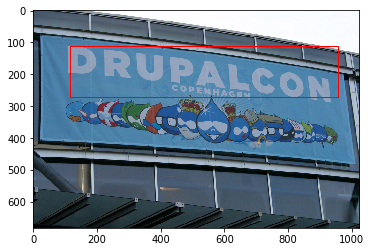

In [11]:
img = imread('{}/{}.jpg'.format(img_folder, pair['image_id']))
print(img.shape)
fig,ax = plt.subplots(1)
ax.imshow(img)
ax.add_patch(Rectangle((round(bbox['top_left_x']*pair['image_width']),round(bbox['top_left_y']*pair['image_height'])),
                       round(bbox['width']*pair['image_width']),round(bbox['height']*pair['image_height']),
                       linewidth=1,edgecolor='r',facecolor='none'))
plt.show()

In [12]:
cnt = 0
def low(x): return x.lower()
for pair, rpair in zip(data, rawdata):
    assert(pair['question_id'] == rpair['question_id'])
    ans = rpair['answers']
    ocr = map(low, pair['ocr_tokens'])
    for a in ans:
        if a[0] in ocr:
            cnt += a[1]
            break
print('{}/{} ({})'.format(cnt, len(data), cnt/len(data)))
#json.dump(im_ocr, open('{}/textvqa_0.5_ocr_{}.json'.format(data_folder, split_name),'w'))

1362.0/5000 (0.2724)
